# Vocoder Analysis

### Setup:

In [150]:
# numerical
import scipy.io
import scipy.signal
import numpy as np
# plotting
import matplotlib.pyplot as plt
%matplotlib notebook
# sound modules
import sounddevice as sd
from scipy.io import wavfile
# warnings
import warnings
warnings.filterwarnings('ignore')  # shut warnings

### Auxiliar functions:

In [151]:
def rescale(signal, factor=6, interpolate=False):
    dom = len(signal)
    if not interpolate:
        new = np.zeros(dom*factor)
        for idx, val in enumerate(signal):
            new[idx*factor] = val
        return new
    # with interpolation:
    return np.interp(np.linspace(0, dom, factor*dom+1), np.arange(dom), signal)

### Loading files:

In [152]:
mat = scipy.io.loadmat('sintesis.mat')  # dict
# delete useless data
del mat['__header__']
del mat['__version__']
del mat['__globals__']
print(mat.keys())

dict_keys(['coef', 'excit', 'ganancia'])


In [153]:
B = mat['ganancia'][0]
a_i = mat['coef']
x_n = mat['excit']

print("B   (type, shape) = ", type(B), B.shape)
print("a_i (type, shape) = ", type(a_i), a_i.shape)
print("x_n (type, shape) = ", type(x_n), x_n.shape)

B   (type, shape) =  <class 'numpy.ndarray'> (401,)
a_i (type, shape) =  <class 'numpy.ndarray'> (401, 11)
x_n (type, shape) =  <class 'numpy.ndarray'> (401, 120)


# Part A

<IPython.core.display.Javascript object>


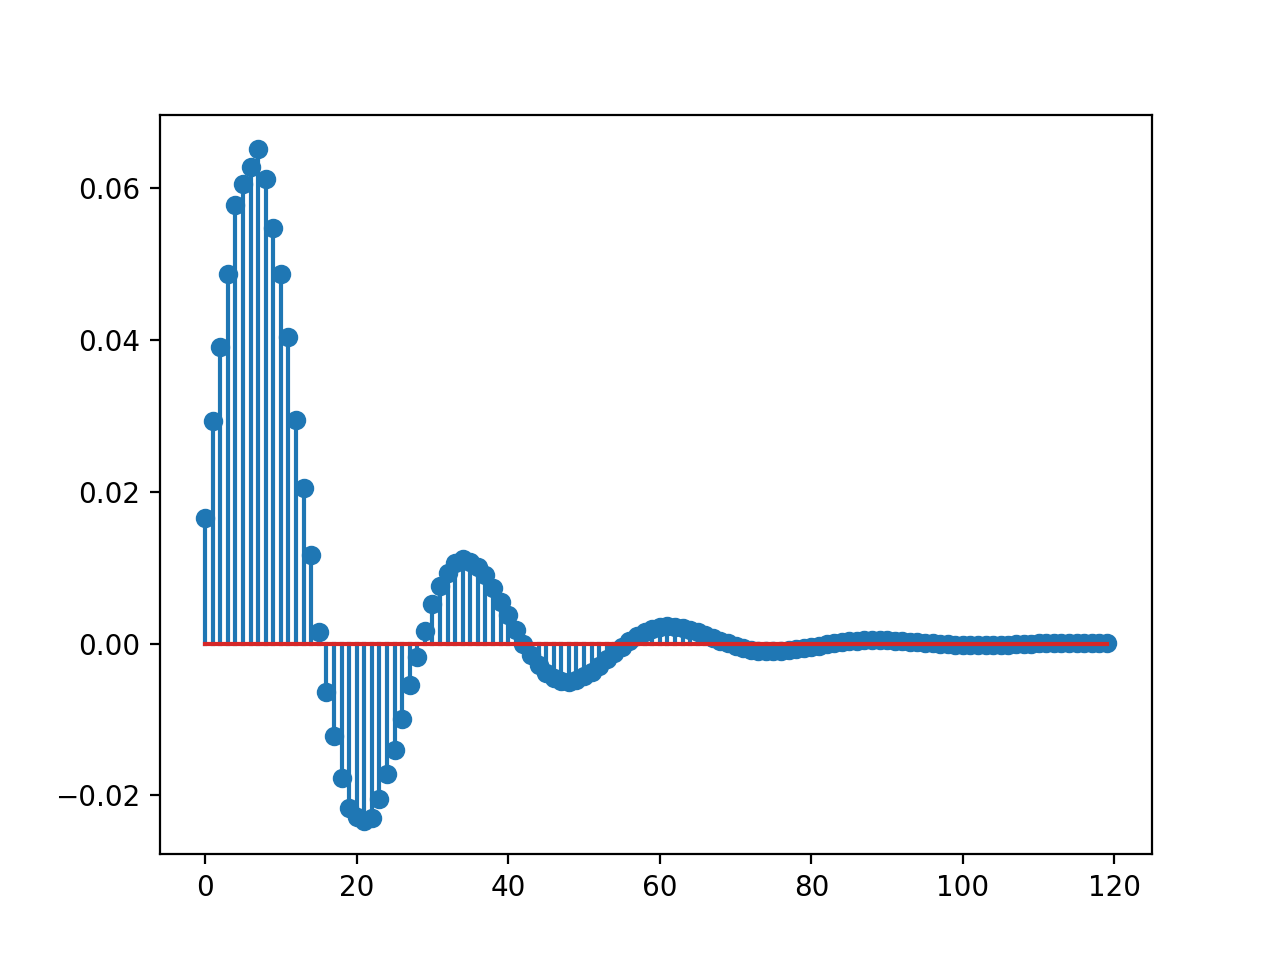

<StemContainer object of 3 artists>

In [154]:
dK = np.array([1]+[0]*119)  # Kronecker delta
h_n = scipy.signal.lfilter([B[99]], a_i[99], dK, axis= -1, zi=None)  # impulse response 
plt.close('all')
plt.stem(range(120), h_n)

In [ ]:
print(len(h_n))

## Conclusion Part A
The impulse response has length 120

# Part B

<IPython.core.display.Javascript object>


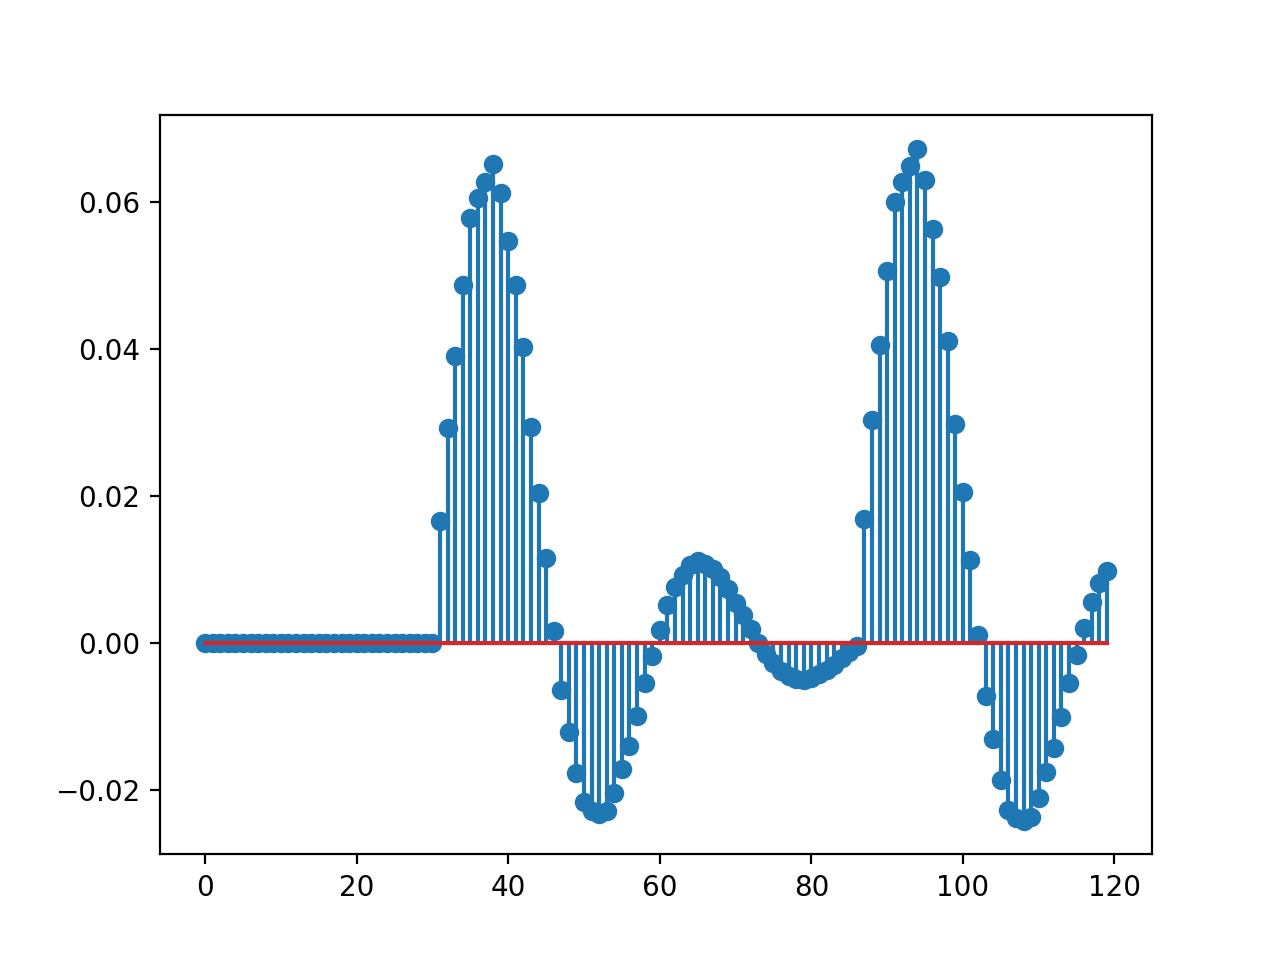

<StemContainer object of 3 artists>

In [155]:
y_n = scipy.signal.lfilter([B[99]], a_i[99], x_n[99], axis= -1, zi=None)
plt.close('all')
plt.stem(range(120), y_n)

# Part C

<IPython.core.display.Javascript object>


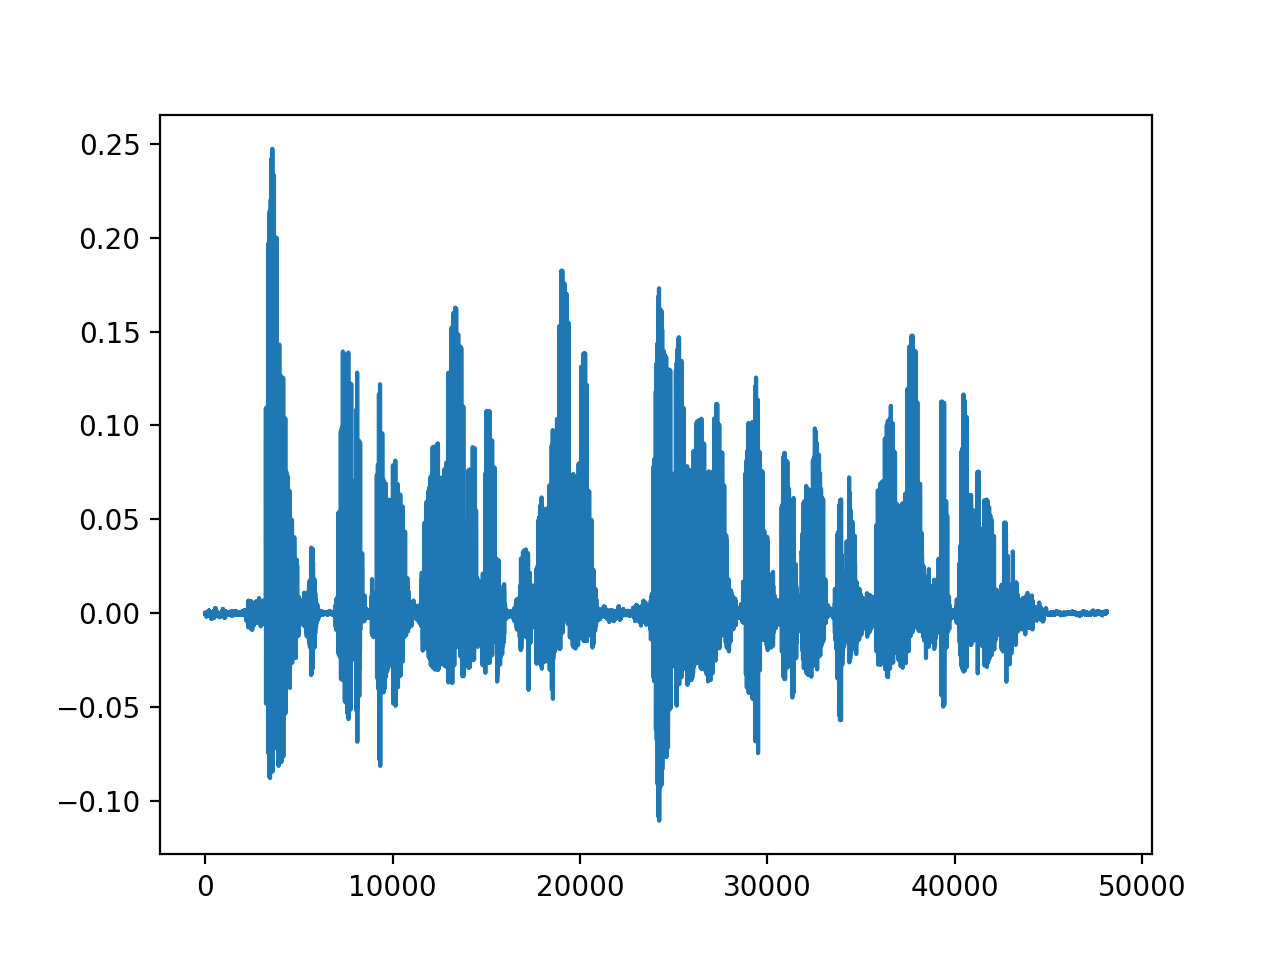

In [156]:
domain = range(120*401)
output = np.array([])
for n in range(401):
    output = np.append(output, scipy.signal.lfilter([B[n]], a_i[n], x_n[n], axis= -1, zi=None))

plt.close('all')
plt.plot(domain, output)

In [143]:
sd.play(output)

The output signal is quite short to be heard propperly, thus let output be rescaled for the sake of practicality:

In [157]:
output_r = rescale(output)
sd.play(output_r)

# Part D

In [158]:
idxs = np.argwhere(output==0)
print("There are ", len(idxs), " points where output is zero")
first_zero =  idxs[0,0]
print("The first index where output is zero: ", first_zero)

There are  4927  points where output is zero
The first index where output is zero:  3360


<IPython.core.display.Javascript object>


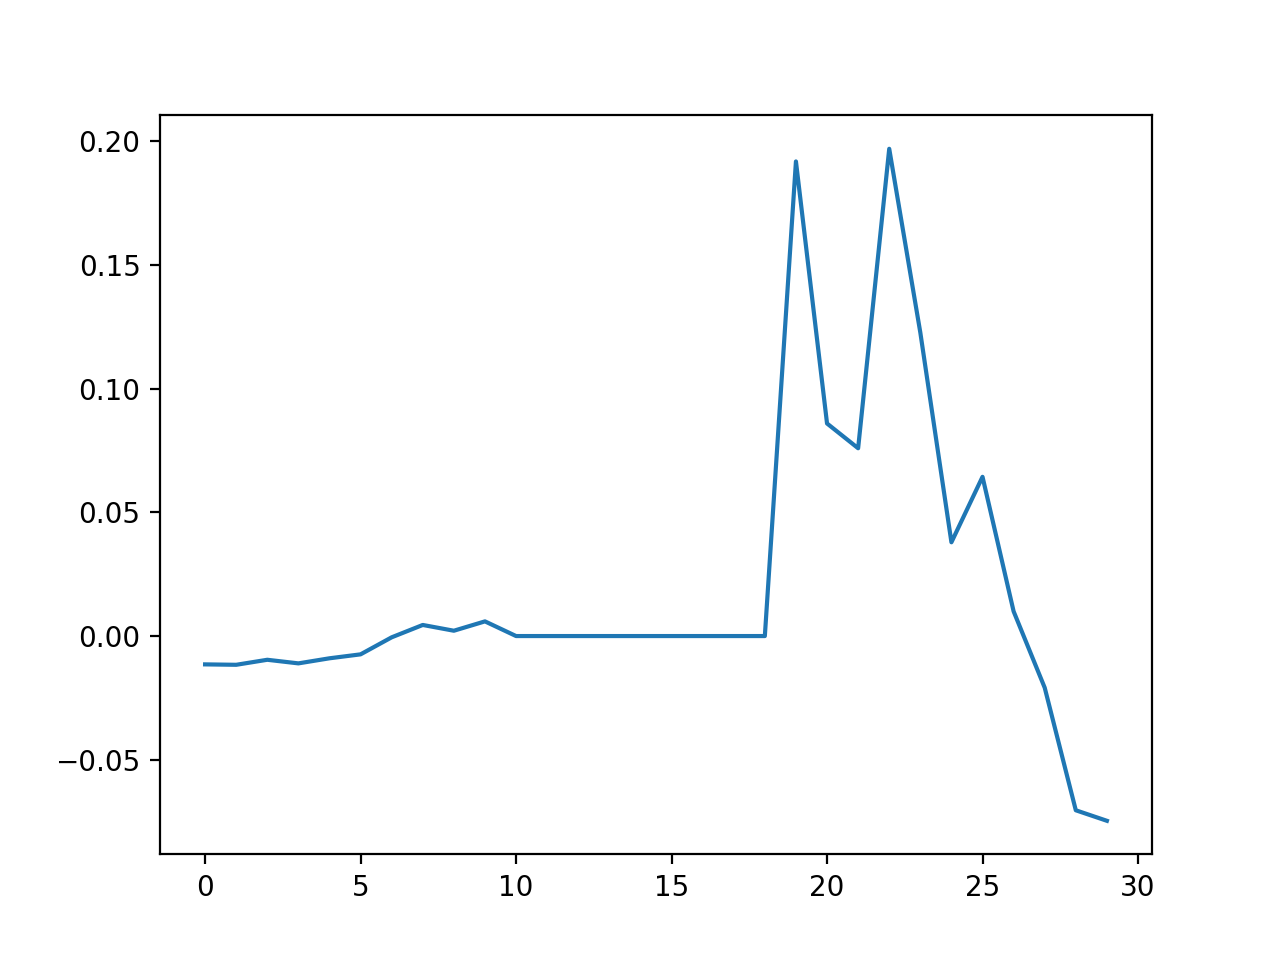

In [159]:
plt.close('all')
plt.plot(range(30), output[first_zero - 10:first_zero+20])

## Conclusion Part D
In this example we can see that there is a secuence where the output is zero, and suddenly it changes to a higher value. If we do this for every zero secuence we can see the changes in the signal

# Part E

In [160]:
output2 = np.array([])
zf = np.zeros(10)
for n in range(401):
    evaluate, zf = scipy.signal.lfilter([B[n]], a_i[n], x_n[n], axis= -1, zi=zf[-10:])
    output2 = np.append(output2, evaluate)

<IPython.core.display.Javascript object>


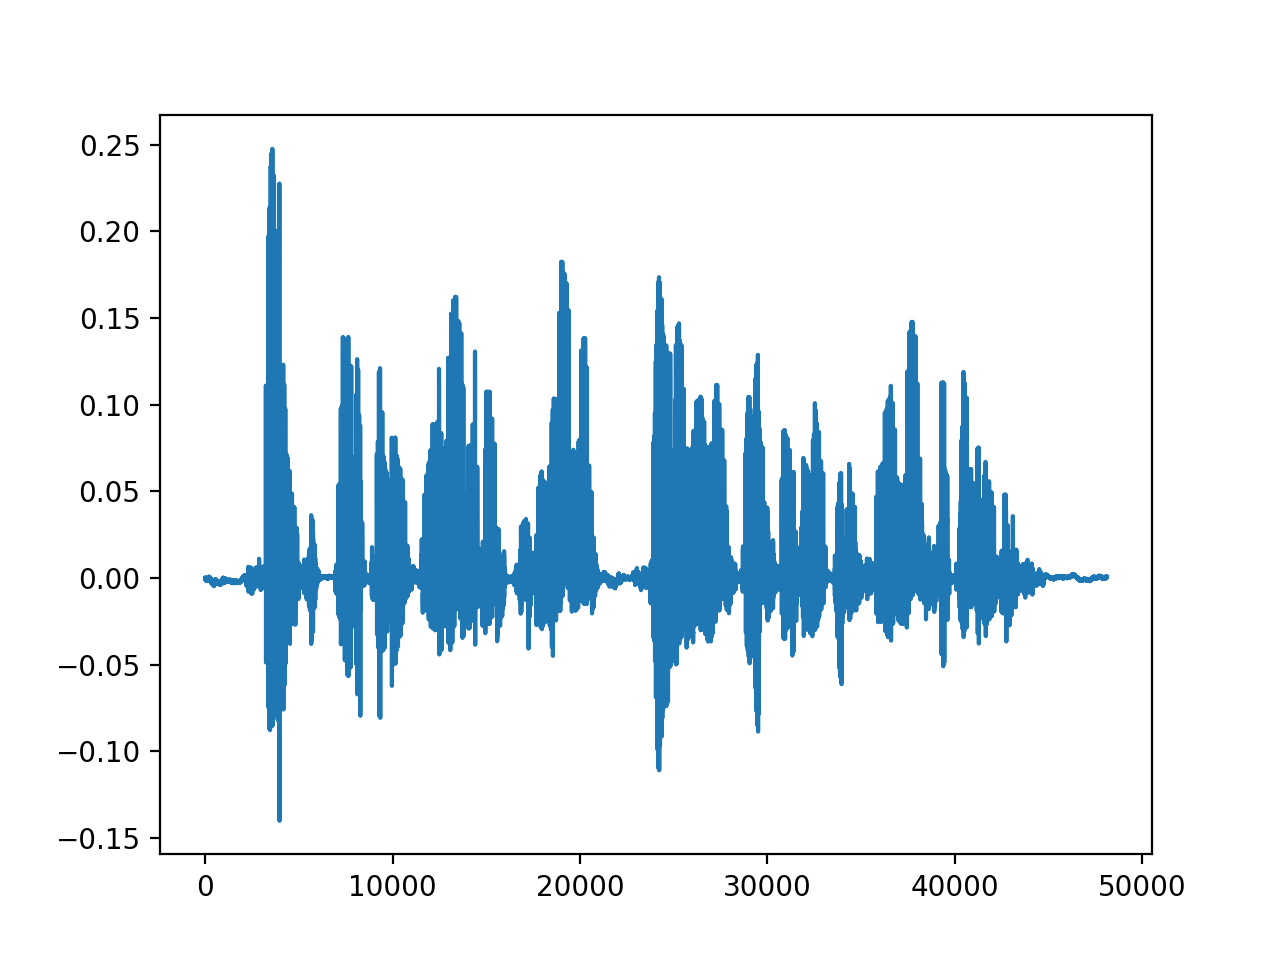

In [161]:
plt.close('all')
plt.plot(range(120*401), output2)

In [162]:
idxs = np.argwhere(output2==0)
print(len(idxs))

0


## Conclusion Part E
It is shown by the last cell of code that there are 0 indexes where the signal is zero.

# Part F

Again, let output2 be rescaled:

In [163]:
output2_r = rescale(output2, interpolate=True)

In [165]:
sd.play(output_r)

In [166]:
sd.play(output2_r)

## Conclusion Part F
The first signal is of a such lower quality than the second one. This is because the output2 signal has been fedback with itself, and the union of the phonems is smoother. Therefore it sounds more clear.